# 4. Feature Engineering <a id='4_feature_engineering'></a>

## 4.1 Contents<a id='4.1_Contents'></a>

* [4. Feature Engineering](#4_feature_engineering)
    * [4.1 Contents](#4.1_Contents)
    * [4.2 Introduction](#4.2_Introduction)
    * [4.3 Imports](#4.3_Imports)
        * [4.3.1 Import packages](#4.3.1_import_packages)
        * [4.3.2 Import data and create pairplot graph to view skew](#4.3.2_import_data)
    * [4.4 Create Features](#4.4_create_features)
        * [4.4.1 Fix Negative Skew for Social Support](#4.4.1_nskew_social)
        * [4.4.2 Fix Negative Skew for Healthy Life Expectancy](#4.4.2_nskew_health)
        * [4.4.3 Fix Negative Skew for Freedom to Make Life Choices](#4.4.3_nskew_freedom)
        * [4.4.4 Fix Negative Skew for Perception of Corruption](#4.4.4_nskew_corruption)
        * [4.4.5 Fix Negative Skew for Labor Participation](#4.4.5_nskew_laborppt)
        * [4.4.6 Fix Positive Skew for Generosity](#4.4.6_pskew_generosity)
        * [4.4.7 Fix Positive Skew for Gini](#4.4.7_pskew_gini)
        * [4.4.8 Fix Positive Skew for Income per Capita](#4.4.8_pskew_income)
        * [4.4.9 Fix Positive Skew for Fertility](#4.4.9_pskew_fertility)
        * [4.4.10 Fix Positive Skew for Child Mortality](#4.4.10_pskew_childmort)
        * [4.4.11 Standardize Features](#4.4.11_standardize)
        * [4.4.12 Create Dummy variables for Regional Indicator](#4.4.12_dummies)
    * [4.5 Split Data into a Training and Test set](#4.5_split)
    * [4.6 Export Final Dataset](#4.6_export)
    

## 4.2 Introduction  <a id='4.2_Introduction'></a>

Now that we have finished with EDA, we need to continue with preprocessing and Training Data Development

**Goal:** Create a cleaned development dataset you can use to complete the modeling step of your project.

**Steps:**
  
1. Create dummy or indicator features for categorical variables - We may want to apply this to the region column.
2. Addres skew in data, **Social Support, Healthy life expectancy, Freedom to make life choices, Perceptions of corruption and labor_ppt_25-54 all appear negatively skewed while Generosity, gini, income_per_capita, fertility, child_mortality appear to be positively skewed based on EDA we did earlier.** 
3. Standardize the magnitude of numeric features using a scaler - We will want to standardize values as we likely will be using linear regression and perhaps some distance based classification models. 
4. Split into testing and training datasets

## 4.3. Imports <a id=4.3_Imports></a>

### 4.3.1 Import packages <a id='4.3.1_import_packages'></a>

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer

### 4.3.2 Import data and create pairplot graph to view skew<a id='4.3.2_import_data'></a>

In [9]:
# import data wrangled dataset from previous step.

df = pd.read_csv('whr2021_clean_v5.csv')
df.head()

Country name Regional indicator  Ladder score  Logged GDP per capita  \
0      Finland     Western Europe         7.842                 10.775   
1      Denmark     Western Europe         7.620                 10.933   
2  Switzerland     Western Europe         7.571                 11.117   
3      Iceland     Western Europe         7.554                 10.878   
4  Netherlands     Western Europe         7.464                 10.932   

   Social support  Healthy life expectancy  Freedom to make life choices  \
0           0.954                     72.0                         0.949   
1           0.954                     72.7                         0.946   
2           0.942                     74.4                         0.919   
3           0.983                     73.0                         0.955   
4           0.942                     72.4                         0.913   

   Generosity  Perceptions of corruption  gini  income_per_capita  fertility  \
0      -0.098                      0.186  27.1            43500.0       1.79   
1       0.030                      0.179  28.2            49500.0       1.78   
2       0.025                      0.292  32.3            59300.0       1.56   
3       0.160                      0.673  27.8            47800.0       1.89   
4       0.175                      0.338  28.2            51800.0       1.76   

   child_mortality  labor_ppt_25-54  
0             1.52             86.2  
1             3.85             87.2  
2             3.81             90.9  
3             1.85             90.9  
4             3.42             87.8

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country name                  140 non-null    object 
 1   Regional indicator            140 non-null    object 
 2   Ladder score                  140 non-null    float64
 3   Logged GDP per capita         140 non-null    float64
 4   Social support                140 non-null    float64
 5   Healthy life expectancy       140 non-null    float64
 6   Freedom to make life choices  140 non-null    float64
 7   Generosity                    140 non-null    float64
 8   Perceptions of corruption     140 non-null    float64
 9   gini                          140 non-null    float64
 10  income_per_capita             140 non-null    float64
 11  fertility                     140 non-null    float64
 12  child_mortality               140 non-null    float64
 13  labor

array([[<AxesSubplot:title={'center':'Ladder score'}>,
        <AxesSubplot:title={'center':'Logged GDP per capita'}>,
        <AxesSubplot:title={'center':'Social support'}>],
       [<AxesSubplot:title={'center':'Healthy life expectancy'}>,
        <AxesSubplot:title={'center':'Freedom to make life choices'}>,
        <AxesSubplot:title={'center':'Generosity'}>],
       [<AxesSubplot:title={'center':'Perceptions of corruption'}>,
        <AxesSubplot:title={'center':'gini'}>,
        <AxesSubplot:title={'center':'income_per_capita'}>],
       [<AxesSubplot:title={'center':'fertility'}>,
        <AxesSubplot:title={'center':'child_mortality'}>,
        <AxesSubplot:title={'center':'labor_ppt_25-54'}>]], dtype=object)

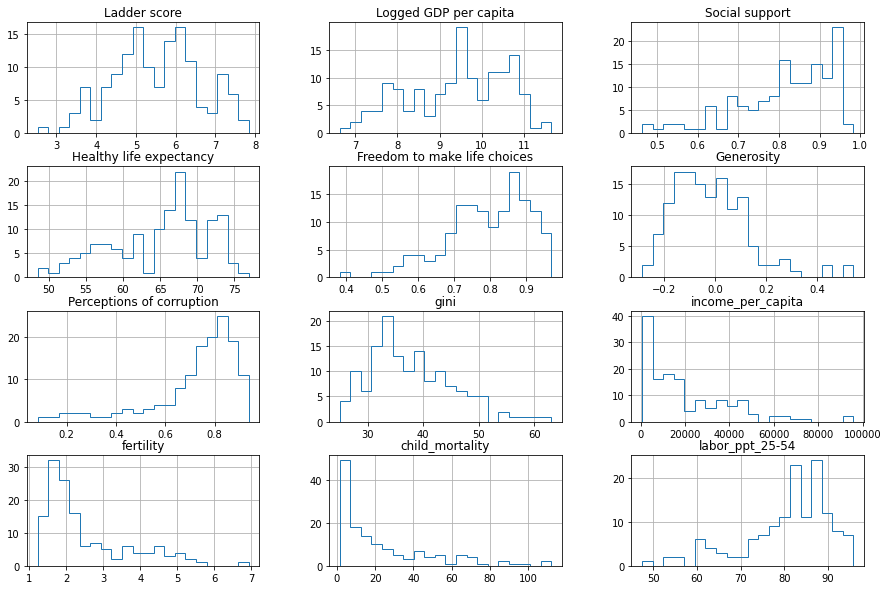

In [10]:
df.hist(figsize=(15,10), bins=20, histtype='step')

## 4.4 Create Features <a id=4.4_create_features></a>

### 4.4.1 Fix Negative Skew for Social Support <a id='4.4.1_nskew_social'><a/>

I would first like to see if PowerTransformer can handle negatively skewed data.

(array([ 8., 10., 14., 15., 20., 18., 16., 16., 21.,  2.]),
 array([-2.07251336, -1.66822585, -1.26393834, -0.85965083, -0.45536332,
        -0.05107581,  0.3532117 ,  0.75749921,  1.16178672,  1.56607423,
         1.97036174]),
 <BarContainer object of 10 artists>)

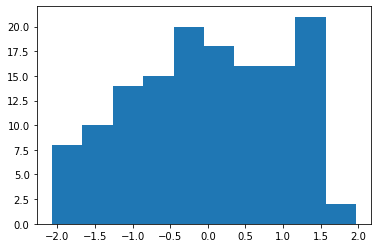

In [39]:
powertransformer = PowerTransformer(standardize=True)

negative_skew_test = powertransformer.fit_transform(df[['Social support']])
plt.hist(negative_skew_test)


array([[<AxesSubplot:title={'center':'Social support'}>,
        <AxesSubplot:title={'center':'norm Social support'}>]],
      dtype=object)

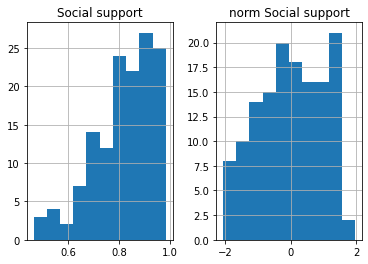

In [37]:
social_support_df = pd.DataFrame(negative_skew_test, columns=['norm Social support'])

pandas_df = df[['Social support']]

test_df = pd.concat([pandas_df, social_support_df], axis=1)
test_df.hist()

Based on the graph between the raw Social Support data and normalized version, it appears we removed some skew. Now we need to test to see if we can do multiple features at once.

### 4.4.2 Fix Negative Skew for Healthy Life Expectancy <a id='4.4.2_nskew_health'><a/>

array([[<AxesSubplot:title={'center':'Social support'}>,
        <AxesSubplot:title={'center':'Healthy life expectancy'}>]],
      dtype=object)

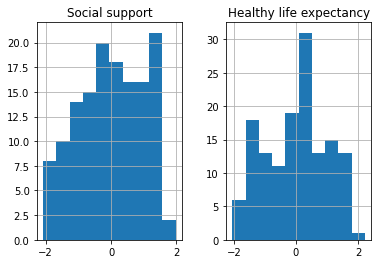

In [54]:
df_skew_test = df.loc[:, ['Social support', 'Healthy life expectancy']]

powertransformer = PowerTransformer()

norm_test = powertransformer.fit_transform(df_skew_test)

df_norm_test = pd.DataFrame(norm_test, columns=df_skew_test.columns)
df_norm_test.hist()

Looks like we can use PowerTransform on the entire data set that we want to de-skew

### 4.4.3 Fix Negative Skew for Freedom to Make Life Choices <a id='4.4.3_nskew_freedom'><a/>

### 4.4.4 Fix Negative Skew for Perception of Corruption <a id='4.4.4_nskew_corruption'><a/>

### 4.4.5 Fix Negative Skew for Labor Participation <a id='4.4.5_nskew_laborppt'><a/>

### 4.4.6 Fix Positive Skew for Generosity <a id='4.4.6_pskew_generosity'><a/>

### 4.4.7 Fix Positive Skew for Gini <a id='4.4.7_pskew_gini'><a/>

### 4.4.8 Fix Positive Skew for Income Per Capita <a id='4.4.8_pskew_income'><a/>

### 4.4.9 Fix Positive Skew for Fertility <a id='4.4.8_pskew_fertility'><a/>

### 4.4.10 Fix Positive Skew for Child Mort <a id='4.4.10_pskew_childmort'><a/>

In [71]:
# select columns we want to fix skew by excluding the categorical variables and Ladder score since it is normal

df_skewed = df.drop(['Country name', 'Regional indicator', 'Ladder score'], axis=1)

df_skewed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Logged GDP per capita         140 non-null    float64
 1   Social support                140 non-null    float64
 2   Healthy life expectancy       140 non-null    float64
 3   Freedom to make life choices  140 non-null    float64
 4   Generosity                    140 non-null    float64
 5   Perceptions of corruption     140 non-null    float64
 6   gini                          140 non-null    float64
 7   income_per_capita             140 non-null    float64
 8   fertility                     140 non-null    float64
 9   child_mortality               140 non-null    float64
 10  labor_ppt_25-54               140 non-null    float64
dtypes: float64(11)
memory usage: 12.2 KB


array([[<AxesSubplot:title={'center':'norm_Logged GDP per capita'}>,
        <AxesSubplot:title={'center':'norm_Social support'}>,
        <AxesSubplot:title={'center':'norm_Healthy life expectancy'}>],
       [<AxesSubplot:title={'center':'norm_Freedom to make life choices'}>,
        <AxesSubplot:title={'center':'norm_Generosity'}>,
        <AxesSubplot:title={'center':'norm_Perceptions of corruption'}>],
       [<AxesSubplot:title={'center':'norm_gini'}>,
        <AxesSubplot:title={'center':'norm_income_per_capita'}>,
        <AxesSubplot:title={'center':'norm_fertility'}>],
       [<AxesSubplot:title={'center':'norm_child_mortality'}>,
        <AxesSubplot:title={'center':'norm_labor_ppt_25-54'}>,
        <AxesSubplot:>]], dtype=object)

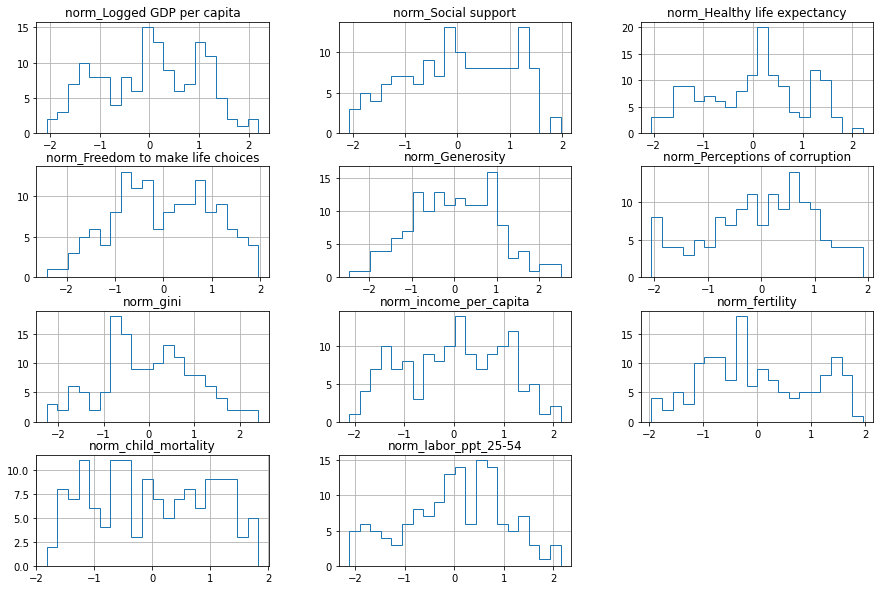

In [72]:
# Instantiate PowerTransformer and appky to skewed dataset

powertransformer = PowerTransformer()
df_unskewed = powertransformer.fit_transform(df_skewed)

# create list of updated column names
col_names = df_skewed.columns
updated_cnames = ['norm_' + i for i in col_names]

# create new df and plot histogram of all variables to see if there still is skew

df_unskewed = pd.DataFrame(df_unskewed, columns=updated_cnames)
df_unskewed.hist(figsize=(15,10), bins=20,histtype='step')

In [73]:
df_unskewed

norm_Logged GDP per capita  norm_Social support  \
0                      1.226944             1.502062   
1                      1.394624             1.502062   
2                      1.594036             1.320956   
3                      1.335883             1.970362   
4                      1.393552             1.320956   
..                          ...                  ...   
135                   -1.257183            -0.461257   
136                    0.246982            -0.487102   
137                   -1.428715            -1.813232   
138                   -1.245259            -0.761167   
139                   -1.415929            -2.072513   

     norm_Healthy life expectancy  norm_Freedom to make life choices  \
0                        1.128520                           1.660708   
1                        1.271619                           1.619109   
2                        1.633058                           1.258141   
3                        1.333961                           1.744819   
4                        1.209887                           1.181130   
..                            ...                                ...   
135                     -2.028874                          -0.797280   
136                     -0.946056                           0.165191   
137                     -0.663217                           0.981283   
138                     -1.312898                          -1.071062   
139                     -1.697093                          -2.409099   

     norm_Generosity  norm_Perceptions of corruption  norm_gini  \
0          -0.465277                       -1.994367  -1.745908   
1           0.491002                       -1.999730  -1.505408   
2           0.458837                       -1.886295  -0.721361   
3           1.210970                       -0.678778  -1.591190   
4           1.281711                       -1.820015  -1.505408   
..               ...                             ...        ...   
135        -0.760441                        1.569940   1.800345   
136        -1.964502                        0.288201   2.251254   
137         0.682238                       -2.008494   0.983866   
138        -0.049698                        0.480493   0.780673   
139        -0.499929                        1.692145  -0.018855   

     norm_income_per_capita  norm_fertility  norm_child_mortality  \
0                  1.187030       -0.585790             -1.818155   
1                  1.334289       -0.604059             -1.087653   
2                  1.546273       -1.054440             -1.096598   
3                  1.294106       -0.412187             -1.677188   
4                  1.386909       -0.641122             -1.188360   
..                      ...             ...                   ...   
135               -1.183403        0.699770              1.486730   
136                0.266674        0.395130              0.849260   
137               -1.335933        1.112245              0.755348   
138               -1.319597        1.043754              1.029923   
139               -1.490399        1.281469              1.272830   

     norm_labor_ppt_25-54  
0                0.485035  
1                0.631112  
2                1.223485  
3                1.223485  
4                0.721541  
..                    ...  
135              0.042290  
136              0.767552  
137              2.023265  
138              1.292651  
139             -1.746147  

[140 rows x 11 columns]

In [74]:
# merge unskewed data back with the three variables that was dropped off

df_unskewed = pd.concat([df[['Country name', 'Regional indicator', 'Ladder score']], df_unskewed], axis=1)
df_unskewed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Country name                       140 non-null    object 
 1   Regional indicator                 140 non-null    object 
 2   Ladder score                       140 non-null    float64
 3   norm_Logged GDP per capita         140 non-null    float64
 4   norm_Social support                140 non-null    float64
 5   norm_Healthy life expectancy       140 non-null    float64
 6   norm_Freedom to make life choices  140 non-null    float64
 7   norm_Generosity                    140 non-null    float64
 8   norm_Perceptions of corruption     140 non-null    float64
 9   norm_gini                          140 non-null    float64
 10  norm_income_per_capita             140 non-null    float64
 11  norm_fertility                     140 non-null    float64

### 4.4.11 Standardize Features <a id='4.4.11_standardize'><a/>

Since PowerTransformer normalizes features with mean 0, we don't need to apply StandardScaler on the data set

### 4.4.12 Create Dummy variables for Regional Indicator <a id='4.4.12_dummies'><a/>

In [76]:
df_unskewed['Regional indicator'].value_counts()

Sub-Saharan Africa                    34
Western Europe                        20
Latin America and Caribbean           20
Middle East and North Africa          17
Central and Eastern Europe            15
Commonwealth of Independent States    11
Southeast Asia                         8
South Asia                             7
North America and ANZ                  4
East Asia                              4
Name: Regional indicator, dtype: int64

In [90]:
# Map values to group Asian countries and to put North America with Western Europe as Developed Western Countries

mapping = {'Southeast Asia': 'Asia', 'South Asia': 'Asia', 'East Asia':'Asia', 'Western Europe': 'Developed Western Countries', 'North America and ANZ':'Developed Western Countries'}
df_unskewed.replace({'Regional indicator': mapping}, inplace=True)
df_unskewed['Regional indicator'].value_counts()

Sub-Saharan Africa                    34
Developed Western Countries           24
Latin America and Caribbean           20
Asia                                  19
Middle East and North Africa          17
Central and Eastern Europe            15
Commonwealth of Independent States    11
Name: Regional indicator, dtype: int64

In [92]:
# create dummy variables for Regional indicator

dummy_df = pd.get_dummies(df_unskewed['Regional indicator'])

# Drop Developed Western Countries so that the intercept of a regression will represent this category

dummy_df = dummy_df.drop('Developed Western Countries', axis=1)
dummy_df

Asia  Central and Eastern Europe  Commonwealth of Independent States  \
0       0                           0                                   0   
1       0                           0                                   0   
2       0                           0                                   0   
3       0                           0                                   0   
4       0                           0                                   0   
..    ...                         ...                                 ...   
135     0                           0                                   0   
136     0                           0                                   0   
137     0                           0                                   0   
138     0                           0                                   0   
139     1                           0                                   0   

     Latin America and Caribbean  Middle East and North Africa  \
0                              0                             0   
1                              0                             0   
2                              0                             0   
3                              0                             0   
4                              0                             0   
..                           ...                           ...   
135                            0                             0   
136                            0                             0   
137                            0                             0   
138                            0                             0   
139                            0                             0   

     Sub-Saharan Africa  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  
..                  ...  
135                   1  
136                   1  
137                   1  
138                   1  
139                   0  

[140 rows x 6 columns]

In [93]:
# Merge dummy variables with unskewed data

df_final = pd.concat([df_unskewed, dummy_df], axis=1)
df_final = df_final.drop('Regional indicator', axis=1)
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 19 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country name                        140 non-null    object 
 1   Ladder score                        140 non-null    float64
 2   norm_Logged GDP per capita          140 non-null    float64
 3   norm_Social support                 140 non-null    float64
 4   norm_Healthy life expectancy        140 non-null    float64
 5   norm_Freedom to make life choices   140 non-null    float64
 6   norm_Generosity                     140 non-null    float64
 7   norm_Perceptions of corruption      140 non-null    float64
 8   norm_gini                           140 non-null    float64
 9   norm_income_per_capita              140 non-null    float64
 10  norm_fertility                      140 non-null    float64
 11  norm_child_mortality                140 non-n

## 4.5 Split data into a training and test set  <a id='4.5_split'></a>

In [97]:
X = df_final.drop('Ladder score', axis=1)
y = df_final['Ladder score']


0      7.842
1      7.620
2      7.571
3      7.554
4      7.464
       ...  
135    3.512
136    3.467
137    3.415
138    3.145
139    2.523
Name: Ladder score, Length: 140, dtype: float64

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state = 97)

## 4.6 Export Final Dataset  <a id='4.6_export'></a>

In [85]:
# Export entire dataset

df_final.to_csv(os.getcwd()+'/whr2021_final.csv',index=False)

Instead of exporting the train and test data sets I will resplit using the same random state for the modelling section